<a href="https://colab.research.google.com/github/JuanSepu18/CarvasPredicter/blob/main/proyecto_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Montamos el Drive

In [ ]:
import os
from google.colab import drive

path_ai = "Proyecto_Final" #@param {type:"string"}
path = "/content/drive/MyDrive/" + path_ai
drive.mount('/content/drive')
os.chdir(path)
print(os.getcwd())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Proyecto_Final


Importamos las librerías

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set_theme()
pd.__version__

'1.5.3'

In [ ]:
!pip install pandas-profiling

ZONA DE TRABAJO

In [ ]:
dataset = pd.read_csv("heart_dataset.csv",sep=",")
print(dataset.shape)
dataset.head(100)

(253680, 22)


,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.0,1.0,1.0,1.0,25.0,1.0,0.0,2.0,0.0,1.0,...,1.0,0.0,5.0,15.0,30.0,1.0,0.0,9.0,2.0,3.0
96,0.0,0.0,0.0,1.0,32.0,0.0,0.0,2.0,1.0,0.0,...,0.0,1.0,4.0,0.0,3.0,0.0,0.0,3.0,5.0,3.0
97,0.0,1.0,0.0,1.0,45.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,9.0,4.0,6.0
98,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,0.0,11.0,4.0,3.0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

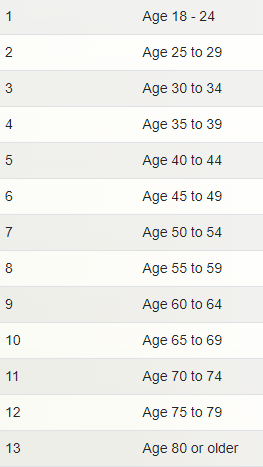

In [ ]:
cantidad_personas_con_ataque = dataset['HeartDiseaseorAttack'].sum()

print("Cantidad de personas con ataque al corazón:", cantidad_personas_con_ataque)

Cantidad de personas con ataque al corazón: 23893.0


Matriz de Correlación, se puede ver que las variables en general no se encuentran muy relacionadas.

<Axes: >

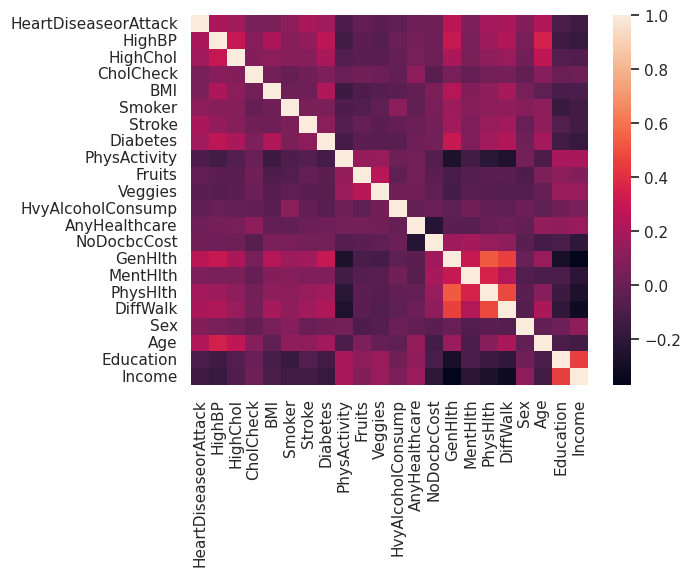

In [ ]:
sns.heatmap(dataset.corr())

In [ ]:
#NUEVO DATA SET CON CORRELACIONES ALTAS DIRECTAMENTES Y CON CORRELACIONES BAJAS INVERSAMENTE

# DATA SET CON LAS SIGUIENTES CARACTERISTICAS = HighBP, HighChol, Smoker, Stroke, Diabetes, PhysActivity,GenHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income

In [ ]:
data_hc = dataset[['Age','DiffWalk','GenHlth','Stroke','HighChol','Diabetes','Smoker','PhysHlth','HighBP','Sex','PhysActivity','Education','Income','HeartDiseaseorAttack']]
data_hc.head()

,Age,DiffWalk,GenHlth,Stroke,HighChol,Diabetes,Smoker,PhysHlth,HighBP,Sex,PhysActivity,Education,Income,HeartDiseaseorAttack
0,9.0,1.0,5.0,0.0,1.0,0.0,1.0,15.0,1.0,0.0,0.0,4.0,3.0,0.0
1,7.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,6.0,1.0,0.0
2,9.0,1.0,5.0,0.0,1.0,0.0,0.0,30.0,1.0,0.0,0.0,4.0,8.0,0.0
3,11.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0,6.0,0.0
4,11.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,5.0,4.0,0.0


<Axes: >

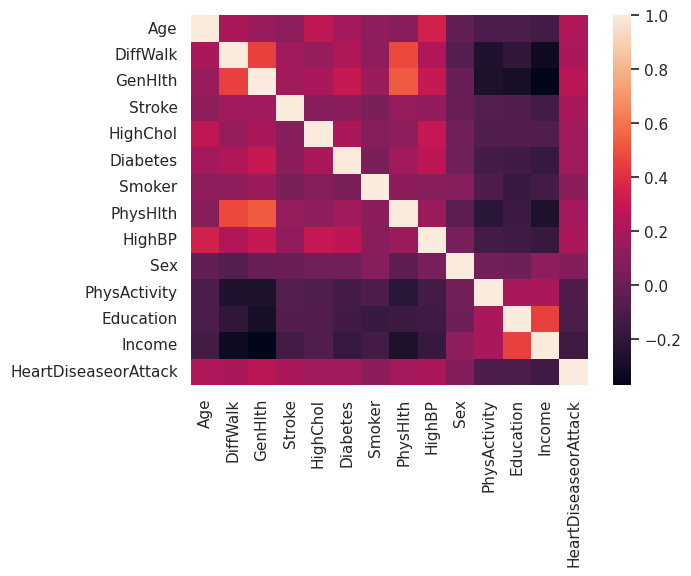

In [ ]:
sns.heatmap(data_hc.corr())

In [ ]:
data_hc.head(10)

,Age,DiffWalk,GenHlth,Stroke,HighChol,Diabetes,Smoker,PhysHlth,HighBP,Sex,PhysActivity,Education,Income,HeartDiseaseorAttack
0,9.0,1.0,5.0,0.0,1.0,0.0,1.0,15.0,1.0,0.0,0.0,4.0,3.0,0.0
1,7.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,6.0,1.0,0.0
2,9.0,1.0,5.0,0.0,1.0,0.0,0.0,30.0,1.0,0.0,0.0,4.0,8.0,0.0
3,11.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0,6.0,0.0
4,11.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,5.0,4.0,0.0
5,10.0,0.0,2.0,0.0,1.0,0.0,1.0,2.0,1.0,1.0,1.0,6.0,8.0,0.0
6,9.0,0.0,3.0,0.0,0.0,0.0,1.0,14.0,1.0,0.0,0.0,6.0,7.0,0.0
7,11.0,1.0,3.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,4.0,4.0,0.0
8,9.0,1.0,5.0,0.0,1.0,2.0,1.0,30.0,1.0,0.0,0.0,5.0,1.0,1.0
9,8.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,3.0,0.0


In [ ]:
correlation = dataset['Age'].corr(dataset['HeartDiseaseorAttack'])

print("Correlación entre  y HeartAttack:", correlation)

Correlación entre  y HeartAttack: 0.22161763244723223


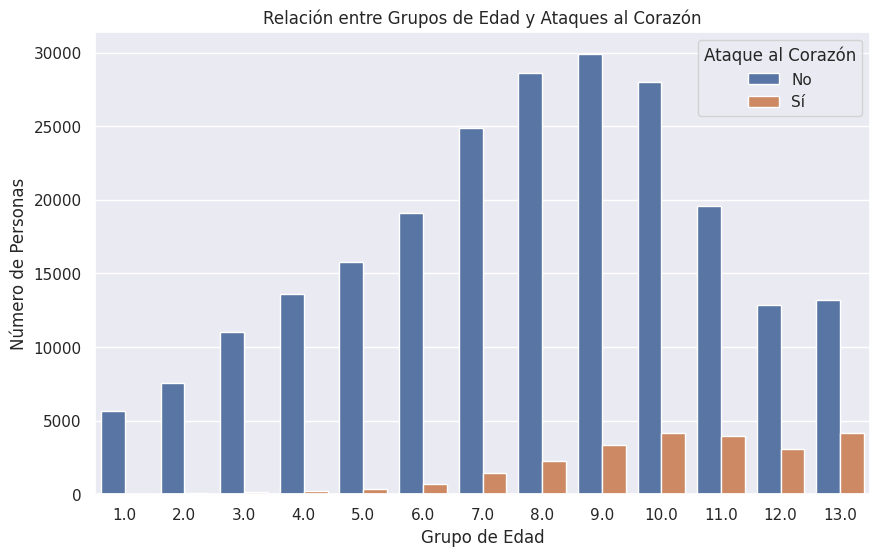

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
sns.countplot(x='Age', hue='HeartDiseaseorAttack', data=data_hc)
plt.title('Relación entre Grupos de Edad y Ataques al Corazón')
plt.xlabel('Grupo de Edad')
plt.ylabel('Número de Personas')
plt.legend(title='Ataque al Corazón', loc='upper right', labels=['No', 'Sí'])
plt.show()

In [ ]:
# Crear un diccionario para almacenar la cantidad de personas con ataques al corazón por grupo de edad
heart_attack_counts = {}

# Iterar a través de los grupos de edad del 1 al 13
for i in range(1, 14):
    # Filtrar el DataFrame para personas en el grupo de edad actual con ataques al corazón
    age_group_with_heart_attack = data_hc[(data_hc['Age'] == i) & (data_hc['HeartDiseaseorAttack'] == 1)]

    # Contar la cantidad de personas en el grupo de edad actual con ataques al corazón y guardar en el diccionario
    heart_attack_counts[f'Grupo {i}'] = len(age_group_with_heart_attack)

# Imprimir la cantidad de personas con ataques al corazón por grupo de edad
for group, count in heart_attack_counts.items():
    print(f'Cantidad de personas en {group} con ataques al corazón: {count}')

Cantidad de personas en Grupo 1 con ataques al corazón: 29
Cantidad de personas en Grupo 2 con ataques al corazón: 54
Cantidad de personas en Grupo 3 con ataques al corazón: 126
Cantidad de personas en Grupo 4 con ataques al corazón: 193
Cantidad de personas en Grupo 5 con ataques al corazón: 351
Cantidad de personas en Grupo 6 con ataques al corazón: 712
Cantidad de personas en Grupo 7 con ataques al corazón: 1425
Cantidad de personas en Grupo 8 con ataques al corazón: 2253
Cantidad de personas en Grupo 9 con ataques al corazón: 3358
Cantidad de personas en Grupo 10 con ataques al corazón: 4193
Cantidad de personas en Grupo 11 con ataques al corazón: 3947
Cantidad de personas en Grupo 12 con ataques al corazón: 3093
Cantidad de personas en Grupo 13 con ataques al corazón: 4159


Text(0.5, 0, 'Grupo de edad')

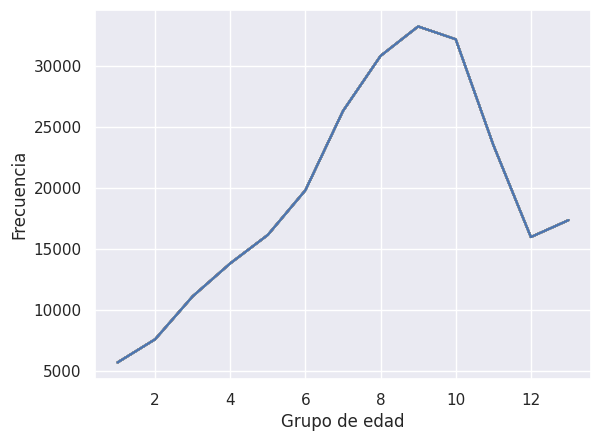

In [ ]:
plt.plot(dataset.groupby("Age").count())
plt.ylabel("Frecuencia")
plt.xlabel("Grupo de edad")

In [ ]:
data_hc.groupby("GenHlth").count()

,Age,DiffWalk,Stroke,HighChol,Diabetes,Smoker,PhysHlth,HighBP,Sex,PhysActivity,Education,Income,HeartDiseaseorAttack
GenHlth,,,,,,,,,,,,,
1.0,45299,45299,45299,45299,45299,45299,45299,45299,45299,45299,45299,45299,45299
2.0,89084,89084,89084,89084,89084,89084,89084,89084,89084,89084,89084,89084,89084
3.0,75646,75646,75646,75646,75646,75646,75646,75646,75646,75646,75646,75646,75646
4.0,31570,31570,31570,31570,31570,31570,31570,31570,31570,31570,31570,31570,31570
5.0,12081,12081,12081,12081,12081,12081,12081,12081,12081,12081,12081,12081,12081


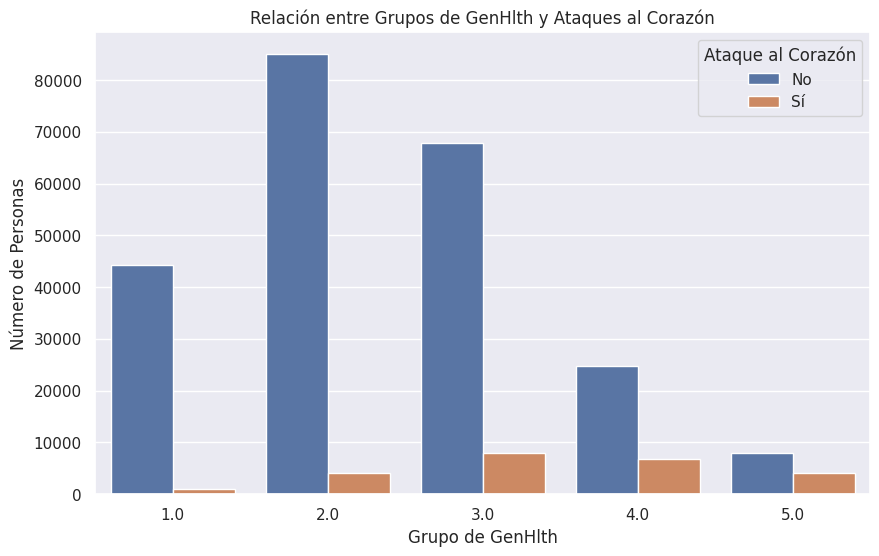

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
sns.countplot(x='GenHlth', hue='HeartDiseaseorAttack', data=data_hc)
plt.title('Relación entre Grupos de GenHlth y Ataques al Corazón')
plt.xlabel('Grupo de GenHlth')
plt.ylabel('Número de Personas')
plt.legend(title='Ataque al Corazón', loc='upper right', labels=['No', 'Sí'])
plt.show()

In [ ]:
# Crear un diccionario para almacenar la cantidad de personas con ataques al corazón por grupo de edad
heart_attack_counts = {}

# Iterar a través de los grupos de edad del 1 al 13
for i in range(1, 6):
    # Filtrar el DataFrame para personas en el grupo de edad actual con ataques al corazón
    age_group_with_heart_attack = data_hc[(data_hc['GenHlth'] == i) & (data_hc['HeartDiseaseorAttack'] == 1)]

    # Contar la cantidad de personas en el grupo de edad actual con ataques al corazón y guardar en el diccionario
    heart_attack_counts[f'Grupo {i}'] = len(age_group_with_heart_attack)

# Imprimir la cantidad de personas con ataques al corazón por grupo de edad
for group, count in heart_attack_counts.items():
    print(f'Cantidad de personas en {group} con ataques al corazón: {count}')

Cantidad de personas en Grupo 1 con ataques al corazón: 1016
Cantidad de personas en Grupo 2 con ataques al corazón: 4128
Cantidad de personas en Grupo 3 con ataques al corazón: 7914
Cantidad de personas en Grupo 4 con ataques al corazón: 6728
Cantidad de personas en Grupo 5 con ataques al corazón: 4107


La mayoría de edades se encuentran entre 45 y 70 años, correspondiente a los grupos de edades entre los números 6 y 10.

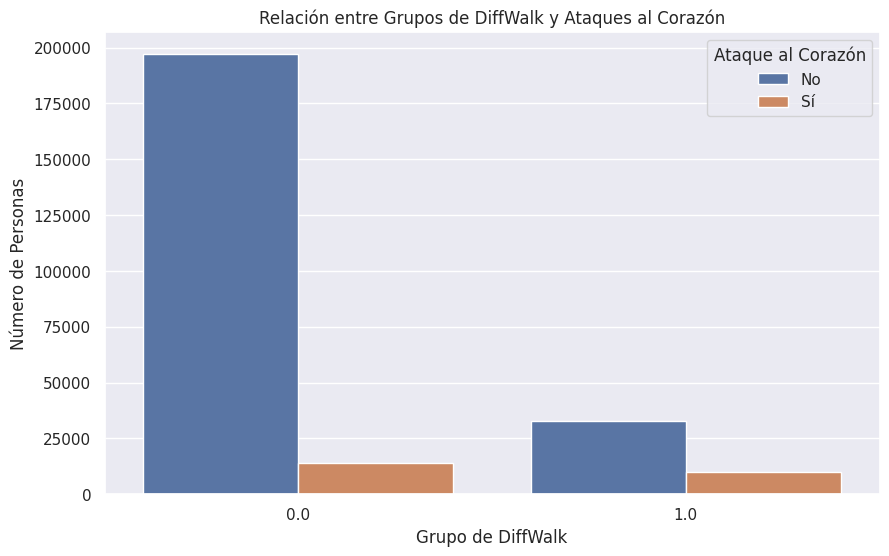

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
sns.countplot(x='DiffWalk', hue='HeartDiseaseorAttack', data=data_hc)
plt.title('Relación entre Grupos de DiffWalk y Ataques al Corazón')
plt.xlabel('Grupo de DiffWalk')
plt.ylabel('Número de Personas')
plt.legend(title='Ataque al Corazón', loc='upper right', labels=['No', 'Sí'])
plt.show()

In [ ]:
data_hc.groupby("DiffWalk").count()

,Age,GenHlth,Stroke,HighChol,Diabetes,Smoker,PhysHlth,HighBP,Sex,PhysActivity,Education,Income,HeartDiseaseorAttack
DiffWalk,,,,,,,,,,,,,
0.0,211005,211005,211005,211005,211005,211005,211005,211005,211005,211005,211005,211005,211005
1.0,42675,42675,42675,42675,42675,42675,42675,42675,42675,42675,42675,42675,42675


In [ ]:
# Crear un diccionario para almacenar la cantidad de personas con ataques al corazón por grupo de edad
heart_attack_counts = {}

# Iterar a través de los grupos de edad del 1 al 13
for i in range(0, 2):
    # Filtrar el DataFrame para personas en el grupo de edad actual con ataques al corazón
    age_group_with_heart_attack = data_hc[(data_hc['DiffWalk'] == i) & (data_hc['HeartDiseaseorAttack'] == 1)]

    # Contar la cantidad de personas en el grupo de edad actual con ataques al corazón y guardar en el diccionario
    heart_attack_counts[f'Grupo {i}'] = len(age_group_with_heart_attack)

# Imprimir la cantidad de personas con ataques al corazón por grupo de edad
for group, count in heart_attack_counts.items():
    print(f'Cantidad de personas en {group} con ataques al corazón: {count}')

Cantidad de personas en Grupo 0 con ataques al corazón: 13978
Cantidad de personas en Grupo 1 con ataques al corazón: 9915


In [ ]:
correlation = dataset['DiffWalk'].corr(dataset['HeartDiseaseorAttack'])

print("Correlación entre  y HeartAttack:", correlation)

Correlación entre  y HeartAttack: 0.212708695290378


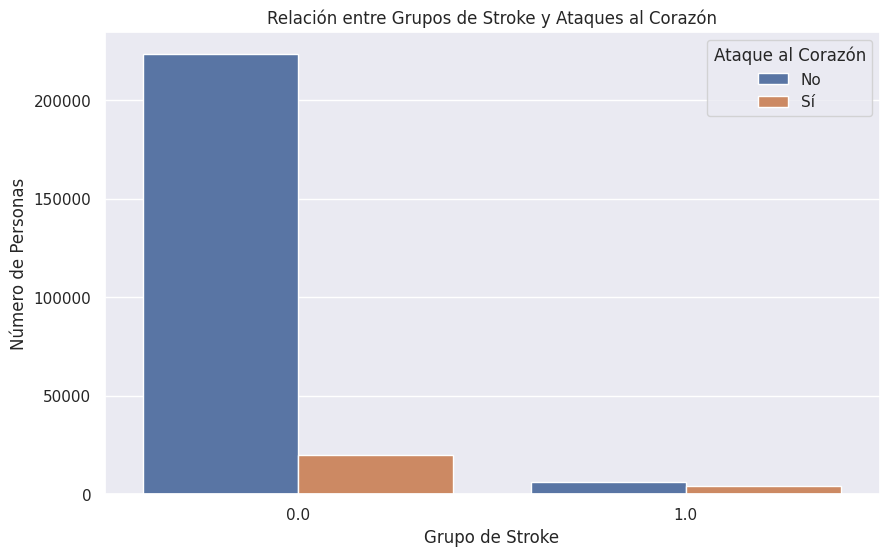

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
sns.countplot(x='Stroke', hue='HeartDiseaseorAttack', data=data_hc)
plt.title('Relación entre Grupos de Stroke y Ataques al Corazón')
plt.xlabel('Grupo de Stroke')
plt.ylabel('Número de Personas')
plt.legend(title='Ataque al Corazón', loc='upper right', labels=['No', 'Sí'])
plt.show()

In [ ]:
# Crear un diccionario para almacenar la cantidad de personas con ataques al corazón por grupo de edad
heart_attack_counts = {}

# Iterar a través de los grupos de edad del 1 al 13

    # Filtrar el DataFrame para personas en el grupo de edad actual con ataques al corazón
age_group_with_heart_attack1 = data_hc[(data_hc['Stroke'] == 0) & (data_hc['HeartDiseaseorAttack'] == 0)]
age_group_with_heart_attack2 = data_hc[(data_hc['Stroke'] == 0) & (data_hc['HeartDiseaseorAttack'] == 1)]
age_group_with_heart_attack3 = data_hc[(data_hc['Stroke'] == 1) & (data_hc['HeartDiseaseorAttack'] == 0)]
age_group_with_heart_attack4 = data_hc[(data_hc['Stroke'] == 1) & (data_hc['HeartDiseaseorAttack'] == 1)]
    # Contar la cantidad de personas en el grupo de edad actual con ataques al corazón y guardar en el diccionario
heart_attack_counts[f'Grupo {1}'] = len(age_group_with_heart_attack1)
heart_attack_counts[f'Grupo {2}'] = len(age_group_with_heart_attack2)
heart_attack_counts[f'Grupo {3}'] = len(age_group_with_heart_attack3)
heart_attack_counts[f'Grupo {4}'] = len(age_group_with_heart_attack4)

# Imprimir la cantidad de personas con ataques al corazón por grupo de edad
for group, count in heart_attack_counts.items():
  print(f' {group} {count}')


#EL GRUPO 2 CON RESPECTO AL 1 REPRESENTA EL 8%

#EL GRUPO 4 CON RESPECTO AL 3 REPRESENTA EL 61%

 Grupo 1 223432
 Grupo 2 19956
 Grupo 3 6355
 Grupo 4 3937


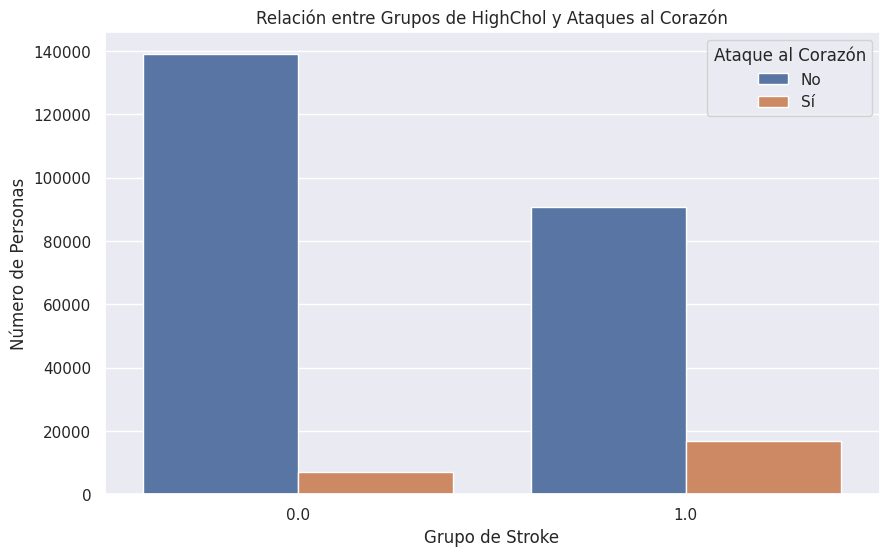

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
sns.countplot(x='HighChol', hue='HeartDiseaseorAttack', data=data_hc)
plt.title('Relación entre Grupos de HighChol y Ataques al Corazón')
plt.xlabel('Grupo de Stroke')
plt.ylabel('Número de Personas')
plt.legend(title='Ataque al Corazón', loc='upper right', labels=['No', 'Sí'])
plt.show()


In [ ]:
# Crear un diccionario para almacenar la cantidad de personas con ataques al corazón por grupo de edad
heart_attack_counts = {}

# Iterar a través de los grupos de edad del 1 al 13

    # Filtrar el DataFrame para personas en el grupo de edad actual con ataques al corazón
age_group_with_heart_attack1 = data_hc[(data_hc['HighChol'] == 0) & (data_hc['HeartDiseaseorAttack'] == 0)]
age_group_with_heart_attack2 = data_hc[(data_hc['HighChol'] == 0) & (data_hc['HeartDiseaseorAttack'] == 1)]
age_group_with_heart_attack3 = data_hc[(data_hc['HighChol'] == 1) & (data_hc['HeartDiseaseorAttack'] == 0)]
age_group_with_heart_attack4 = data_hc[(data_hc['HighChol'] == 1) & (data_hc['HeartDiseaseorAttack'] == 1)]
    # Contar la cantidad de personas en el grupo de edad actual con ataques al corazón y guardar en el diccionario
heart_attack_counts[f'Grupo {1}'] = len(age_group_with_heart_attack1)
heart_attack_counts[f'Grupo {2}'] = len(age_group_with_heart_attack2)
heart_attack_counts[f'Grupo {3}'] = len(age_group_with_heart_attack3)
heart_attack_counts[f'Grupo {4}'] = len(age_group_with_heart_attack4)

# Imprimir la cantidad de personas con ataques al corazón por grupo de edad
for group, count in heart_attack_counts.items():
  print(f' {group} {count}')


#EL GRUPO 2 CON RESPECTO AL 1 REPRESENTA EL 8%

#EL GRUPO 4 CON RESPECTO AL 3 REPRESENTA EL 61%

 Grupo 1 138949
 Grupo 2 7140
 Grupo 3 90838
 Grupo 4 16753


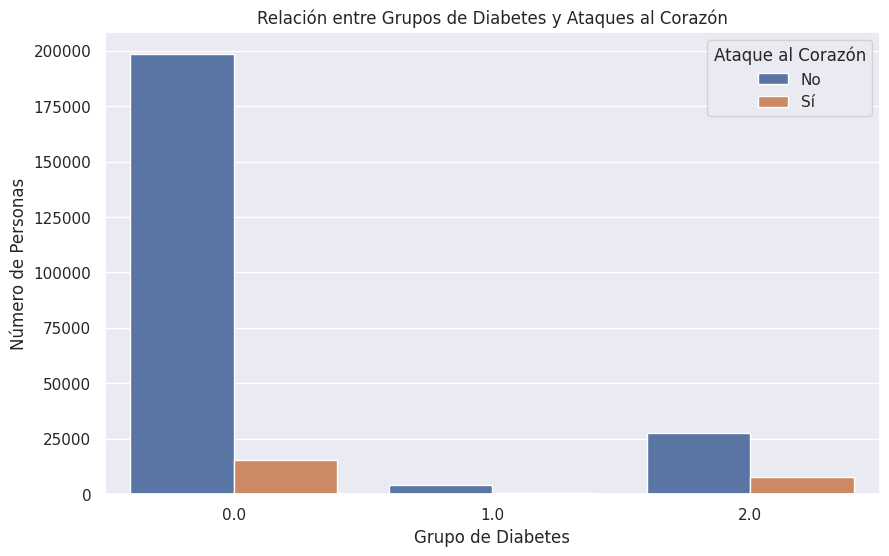

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
sns.countplot(x='Diabetes', hue='HeartDiseaseorAttack', data=data_hc)
plt.title('Relación entre Grupos de Diabetes y Ataques al Corazón')
plt.xlabel('Grupo de Diabetes')
plt.ylabel('Número de Personas')
plt.legend(title='Ataque al Corazón', loc='upper right', labels=['No', 'Sí'])
plt.show()

In [ ]:
# Crear un diccionario para almacenar la cantidad de personas con ataques al corazón por grupo de edad
heart_attack_counts = {}

# Iterar a través de los grupos de edad del 1 al 13
for i in range(0, 3):
    # Filtrar el DataFrame para personas en el grupo de edad actual con ataques al corazón
    age_group_with_heart_attack = data_hc[(data_hc['Diabetes'] == i) & (data_hc['HeartDiseaseorAttack'] == 1)]

    # Contar la cantidad de personas en el grupo de edad actual con ataques al corazón y guardar en el diccionario
    heart_attack_counts[f'Grupo {i}'] = len(age_group_with_heart_attack)

# Imprimir la cantidad de personas con ataques al corazón por grupo de edad
for group, count in heart_attack_counts.items():
    print(f'Cantidad de personas en {group} con ataques al corazón: {count}')

Cantidad de personas en Grupo 0 con ataques al corazón: 15351
Cantidad de personas en Grupo 1 con ataques al corazón: 664
Cantidad de personas en Grupo 2 con ataques al corazón: 7878


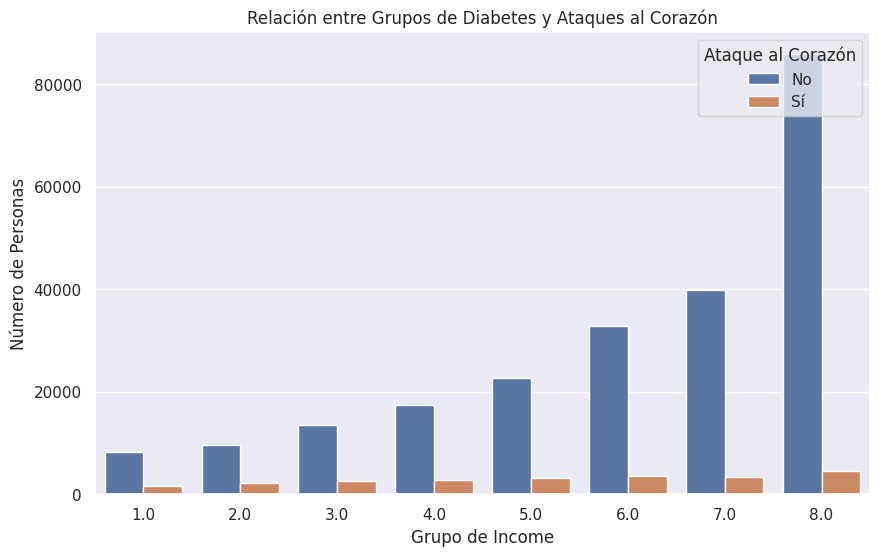

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
sns.countplot(x='Income', hue='HeartDiseaseorAttack', data=data_hc)
plt.title('Relación entre Grupos de Diabetes y Ataques al Corazón')
plt.xlabel('Grupo de Income')
plt.ylabel('Número de Personas')
plt.legend(title='Ataque al Corazón', loc='upper right', labels=['No', 'Sí'])
plt.show()

In [ ]:
data_hc.groupby("Income").count()

,Age,DiffWalk,GenHlth,Stroke,HighChol,Diabetes,Smoker,PhysHlth,HighBP,Sex,PhysActivity,Education,HeartDiseaseorAttack
Income,,,,,,,,,,,,,
1.0,9811,9811,9811,9811,9811,9811,9811,9811,9811,9811,9811,9811,9811
2.0,11783,11783,11783,11783,11783,11783,11783,11783,11783,11783,11783,11783,11783
3.0,15994,15994,15994,15994,15994,15994,15994,15994,15994,15994,15994,15994,15994
4.0,20135,20135,20135,20135,20135,20135,20135,20135,20135,20135,20135,20135,20135
5.0,25883,25883,25883,25883,25883,25883,25883,25883,25883,25883,25883,25883,25883
6.0,36470,36470,36470,36470,36470,36470,36470,36470,36470,36470,36470,36470,36470
7.0,43219,43219,43219,43219,43219,43219,43219,43219,43219,43219,43219,43219,43219
8.0,90385,90385,90385,90385,90385,90385,90385,90385,90385,90385,90385,90385,90385


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
pd.__version__

'1.5.3'

In [ ]:
from pandas_profiling import ProfileReport
report = ProfileReport(dataset)
report.to_file(output_file='output.html')

#**Segunda Entrega Proyecto final**

###**REPORTE DE CLASIFICACIÓN GNB**

PRIMERA VISUALIZACION SIN OVERSAMPLING NI HYPER PARAMETROS

In [ ]:
from sklearn.metrics import classification_report, f1_score, make_scorer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import *
import numpy as np
import pandas as pd

dataset = pd.read_csv("heart_dataset.csv", sep=",")
data_hc = dataset[['Age', 'DiffWalk', 'GenHlth', 'Stroke', 'HighChol', 'Diabetes', 'Smoker', 'PhysHlth', 'HighBP', 'Sex', 'PhysActivity', 'Education', 'Income', 'HeartDiseaseorAttack']]

X = data_hc.values[:,:-1]
y = data_hc.values[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, shuffle= True, random_state=21)
est = GaussianNB()

est.fit(X_train,y_train)
y_pred = est.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.87      0.91     45867
         1.0       0.30      0.50      0.37      4869

    accuracy                           0.84     50736
   macro avg       0.62      0.69      0.64     50736
weighted avg       0.88      0.84      0.86     50736



SEGUNDA VISUALIZACION HACIENDO OVERSAMPLIG A LOS DATOS
DEBIDO A NUESTRA NECESIDAD DE AUMNETAR LA CLASE 1 DE CASOS EN LOS QUE ES POSITIVO PARA CANCER LE DECIMOS A SMOTE QUE QUEREMOS QUE DESPUES DE HACER EL OVERSAMPLIG NUESTRA CLASE 1 SEA EL 100% DE LA CLASE 0

POR EJEMPLO SI LA CLASE CERO TIENE 100 DATOS Y LA CLASE 1 TIENE 20 DESPUES DEL OVERSAMPLING LA CLASE 1 Y LA CLASE 0 TENDRAS 100 DATOS CADA UNA.

CON ESTE PROCESO HEMOS LOGRADO AUMENTAR AL EFICACIA DE NUESTRO MODELO DE OBTENER UN 0.37 EN EL RECALL A UN 0.71

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA

X = data_hc.values[:, :-1]
y = data_hc.values[:, -1]

# Crear una instancia de SMOTE
smote = SMOTE(sampling_strategy=1, random_state=42)

# Aplicar SMOTE a tus datos
X_resampled, y_resampled = smote.fit_resample(X, y)

# Dividir los datos transformados después de SMOTE y PCA
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=21)

# Crear una instancia del clasificador Gaussian Naive Bayes
est = GaussianNB()

# Entrenar el modelo
est.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = est.predict(X_test)

# Imprimir el informe de clasificación
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.70      0.79      0.74     68929
         1.0       0.76      0.67      0.71     68944

    accuracy                           0.73    137873
   macro avg       0.73      0.73      0.73    137873
weighted avg       0.73      0.73      0.73    137873



OVERSAMPLING + PCA

AHORA APLICAMOS UNA REDUCCIÓN DE CARACTERISTICAS CON PCA, CON UN NUMERO DE COMPONENTES IGUAL A 8 LOGRAMOS MEJORAR UN POCO EL RESULTADO ANTERIOR CON SOLO OVERSAMPLING Y NOS DAMOS CUENTA QUE PARA 8 COMPONENTES EN ADELANTE SE MANTIENE IGUAL EN 0.75 SE LOGRO UNA PEQUEÑA MEJORA.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA

X = data_hc.values[:, :-1]
y = data_hc.values[:, -1]

# Crear una instancia de SMOTE
smote = SMOTE(sampling_strategy=1, random_state=42)

# Aplicar SMOTE a tus datos
X_resampled, y_resampled = smote.fit_resample(X, y)

X_pca = PCA(n_components=8)
X_pca = X_pca.fit_transform(X_resampled)

# Dividir los datos transformados después de SMOTE y PCA
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_resampled, test_size=0.3, random_state=21)

# Crear una instancia del clasificador Gaussian Naive Bayes
est = GaussianNB()

# Entrenar el modelo
est.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = est.predict(X_test)

# Imprimir el informe de clasificación
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.75      0.75      0.75     68929
         1.0       0.75      0.76      0.75     68944

    accuracy                           0.75    137873
   macro avg       0.75      0.75      0.75    137873
weighted avg       0.75      0.75      0.75    137873



GNB + TSNE

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.naive_bayes import GaussianNB

# Tomar solo los primeros 1000 datos
subset_size = 10000
X_subset = X[:subset_size, :]
y_subset = y[:subset_size]

# Crear una instancia de SMOTE
smote = SMOTE(sampling_strategy=1, random_state=42)

# Aplicar SMOTE a tus datos
X_resampled, y_resampled = smote.fit_resample(X_subset, y_subset)

# Aplicar PCA a los datos resampleados
pca = PCA(n_components=8)
X_pca = pca.fit_transform(X_resampled)

# Aplicar t-SNE a los datos transformados por PCA
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_pca)

# Dividir los datos transformados después de t-SNE
X_train, X_test, y_train, y_test = train_test_split(X_tsne, y_resampled, test_size=0.3, random_state=21)

# Crear una instancia del clasificador Gaussian Naive Bayes
est = GaussianNB()

# Entrenar el modelo
est.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = est.predict(X_test)

# Imprimir el informe de clasificación
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

         0.0       0.69      0.66      0.68      2751
         1.0       0.66      0.70      0.68      2643

    accuracy                           0.68      5394
   macro avg       0.68      0.68      0.68      5394
weighted avg       0.68      0.68      0.68      5394



###**DECISION TREE CLASSIFIER (DTC)**




In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

est = DecisionTreeClassifier(max_depth=6)

X = data_hc.values[:, :-1]
y = data_hc.values[:, -1]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=21)
est.fit(X_train, y_train)

print(classification_report(y_test, est.predict(X_test), zero_division=0))


              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     45867
         1.0       0.63      0.05      0.10      4869

    accuracy                           0.91     50736
   macro avg       0.77      0.53      0.52     50736
weighted avg       0.88      0.91      0.87     50736



NUESTRO DESICION TREE CLASSIFIER NO DA DE ENTRADA UN RECALL PEOR QUE EL GNB SIN MODIFICACIONES, VEAMOS CUAL ES EL GRADO DE MEJORAR DESPUES DE LAS ACTUALIZACIONES QUE LE HICIEMOS AL GNB.

PRIMERO DTC CON OVERSAMPLING

Y NOTAMOS QUE AUNQUE EL F1-SCORE SI MEJORA CON RESPECTO AL GNB EL RECALL

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

est = DecisionTreeClassifier(max_depth=10)

X = data_hc.values[:, :-1]
y = data_hc.values[:, -1]

smote = SMOTE(sampling_strategy=1, random_state=42)

# Aplicar SMOTE a tus datos
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, shuffle=True, random_state=21)
est.fit(X_train, y_train)

print(classification_report(y_test, est.predict(X_test), zero_division=0))


              precision    recall  f1-score   support

         0.0       0.78      0.83      0.80     68929
         1.0       0.82      0.76      0.79     68944

    accuracy                           0.80    137873
   macro avg       0.80      0.80      0.80    137873
weighted avg       0.80      0.80      0.80    137873



COMO PRETENDEMOS USAR UNA PROFUNDIDAD Y HYPERPARAMETROS MAS ROBUSTOS QUE PUEDEN CAER EN UNA COMPLEJIDAD MAYOR DIVIDIMOS LOS DATOS PARA TOMAR SOLO PEUQEÑAS MUESTRAS, COMO YA LA FUNCION SHUFFLE ESTA EN EL TRAIN TEST SPLIT NO HAY PROBLEMAS AL HACER ESTO.

Y VEMOS QUE CON MAS PROFUNDIDAD Y UN MUESTREO DE DATOS DE 10000 LOGRAMOS OBTENER UNA MEJORA MUY CONSIDERABLE DE 0.91 CON RECPECTO AL 0.76 DE GNB.

NOTA: TOMAMOS LA MEJOR PRFUNDIDAD, AL AUMENTARLA DE 18 NO CAMBIARA NADA MÁS

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# Crear un clasificador de árbol de decisión
est = DecisionTreeClassifier(max_depth=18)

# Tomar solo los primeros 1000 datos
subset_size = 10000
X_subset = X[:subset_size, :]
y_subset = y[:subset_size]

# Aplicar SMOTE a tus datos
smote = SMOTE(sampling_strategy=1, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_subset, y_subset)

# Dividir los datos transformados después de SMOTE
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, shuffle=True, random_state=21)

# Entrenar el modelo
est.fit(X_train, y_train)

# Imprimir el informe de clasificación
print(classification_report(y_test, est.predict(X_test), zero_division=0))


              precision    recall  f1-score   support

         0.0       0.92      0.90      0.91      2751
         1.0       0.90      0.91      0.91      2643

    accuracy                           0.91      5394
   macro avg       0.91      0.91      0.91      5394
weighted avg       0.91      0.91      0.91      5394



DTC + PCA

NUESTRA CONCLUSION CON RESPECTO AL DTC Y SU CLARA DESMEJORA CON EL PCA ES QUE ESTE SE BENEFICIA DE TENER CARACTERISCAS ASI PUEDE HACER MEJOR SUS RAMAS.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# Crear un clasificador de árbol de decisión
est = DecisionTreeClassifier(max_depth=18)

# Tomar solo los primeros 1000 datos
subset_size = 100000
X_subset = X[:subset_size, :]
y_subset = y[:subset_size]

# Aplicar SMOTE a tus datos
smote = SMOTE(sampling_strategy=1, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_subset, y_subset)

X_pca = PCA(n_components=8)
X_pca = X_pca.fit_transform(X_resampled)

# Dividir los datos transformados después de SMOTE
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_resampled, test_size=0.3, shuffle=True, random_state=21)

# Entrenar el modelo
est.fit(X_train, y_train)

# Imprimir el informe de clasificación
print(classification_report(y_test, est.predict(X_test), zero_division=0))

              precision    recall  f1-score   support

         0.0       0.85      0.82      0.83     27213
         1.0       0.82      0.86      0.84     27183

    accuracy                           0.84     54396
   macro avg       0.84      0.84      0.84     54396
weighted avg       0.84      0.84      0.84     54396



DTC + TSNE EL USO DEL TSNE MANDA LA COMPLEJIDAD POR LOS CIELOS POR ENDE TENDREMOS QUE CONFORMARNOS CON USAR SOLO UN SUBCONJUNTO DE 1000 DATOS, A PESAR DE ESTO SE NOTA UNA LEVE MEJORA.


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Crear un clasificador de árbol de decisión
est = DecisionTreeClassifier(max_depth=18)

# Tomar solo los primeros 100,000 datos
subset_size = 10000
X_subset = X[:subset_size, :]
y_subset = y[:subset_size]

# Aplicar SMOTE a tus datos
smote = SMOTE(sampling_strategy=1, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_subset, y_subset)

# Aplicar PCA a los datos resampleados
pca = PCA(n_components=8)
X_pca = pca.fit_transform(X_resampled)

# Aplicar t-SNE a los datos transformados por PCA
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_pca)

# Dividir los datos transformados después de t-SNE
X_train, X_test, y_train, y_test = train_test_split(X_tsne, y_resampled, test_size=0.3, shuffle=True, random_state=21)

# Entrenar el modelo
est.fit(X_train, y_train)

# Imprimir el informe de clasificación
print(classification_report(y_test, est.predict(X_test), zero_division=0))


              precision    recall  f1-score   support

         0.0       0.87      0.81      0.84      2751
         1.0       0.81      0.88      0.84      2643

    accuracy                           0.84      5394
   macro avg       0.84      0.84      0.84      5394
weighted avg       0.84      0.84      0.84      5394



###**MÁQUINA DE SOPORTE VECTORIAL**


LA MAQUINA DE SOPORTE VECTORIAL RESULTA CAER EN UNA COMPLEJIDAD ALTISIMA, SIENDO ASI QUE PARA DATOS DE 100MIL EN ADELANTE CUESTA MUCHO LOGRAR QUE COMPILE POR ENDE TOMAREMOS MUESTRAS DE 10MIL QUE DA UN ACCURACY BASTANTE SIMILAR A UNO OCN 100MIL DATOS (DEJE COMPILANDO LOS 100MIL DATOS Y GENERO 0.90)

ADEMAS EN SU KERNEL USAR POLY TAMBIEN AUMENTA MUCHO LA COMPLEJIDAD Y SU MEJORA NO ES TANTA POR ENDE ESTAREMOS EN LINEAR CON 10MIL DATOS PARA LAS PRUEBAS CON LA MSV

In [ ]:
def tpr(est,X,y):
    p = est.predict(X)
    return np.mean (p[y==1] == y[y==1])

def tnr(est,X,y):
    p = est.predict(X)
    return np.mean(p[y==0] == y[y==0])

PRIMER CASO SIN ALTERACIONES YA GENERA UN ACCURACY B UENO
PERO VIENDO EL RECALL EN REALIDAD LO HACE BASTANTE MAL

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Reducción del tamaño del conjunto de datos
subset_size = 10000  # Elige el tamaño del subconjunto que deseas

X_subset = X[:subset_size]
y_subset = y[:subset_size]

# División del subconjunto en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_subset, y_subset, test_size=0.2, shuffle=True, random_state=21)

# Creación e entrenamiento del modelo SVM
est = SVC(kernel='linear', C=1.0, gamma='scale')
est.fit(X_train, y_train)

# Evaluación del modelo en el subconjunto de prueba
y_pred = est.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)


print("Accuracy en el subconjunto de prueba:", accuracy)

print("Recall en el subconjunto de prueba:", recall)

Accuracy en el subconjunto de prueba: 0.897
Recall en el subconjunto de prueba: 0.0


MSV CON OVERSAMPLING
NOTAMOS UNA MEJORA CONSIDERABLE, DE 0 A 0.83 LO QUE ERA DE ESPERARSE YA QUE AL HABER DIVIDIDO LOS DATOS EN UN CONJUNTO DONDE  LA CLASE DE INTERES ES TAN BAJA QUE HAYA GENERADO 0 DE RECALL ERA NORMAL, PERO AHORA QUE LAS CLASES ESTAN IGUALADAS SE NOTA LA MEJORA.

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Reducción del tamaño del conjunto de datos
subset_size = 10000  # Elige el tamaño del subconjunto que deseas

X_subset = X[:subset_size]
y_subset = y[:subset_size]


smote = SMOTE(sampling_strategy=1, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_subset, y_subset)


# División del subconjunto en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, shuffle=True, random_state=21)

# Creación e entrenamiento del modelo SVM
est = SVC(kernel='linear', C=1.0, gamma='scale')
est.fit(X_train, y_train)

# Evaluación del modelo en el subconjunto de prueba
y_pred = est.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)


print("Accuracy en el subconjunto de prueba:", accuracy)

print("Recall en el subconjunto de prueba:", recall)

Accuracy en el subconjunto de prueba: 0.771134593993326
Recall en el subconjunto de prueba: 0.8363112391930836


MSV CON PCA SE MANTIENE IGUAL NO MEJORA NI EMPEORA

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Reducción del tamaño del conjunto de datos
subset_size = 10000  # Elige el tamaño del subconjunto que deseas

X_subset = X[:subset_size]
y_subset = y[:subset_size]


smote = SMOTE(sampling_strategy=1, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_subset, y_subset)

X_pca = PCA(n_components=8)
X_pca = X_pca.fit_transform(X_resampled)

# División del subconjunto en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_resampled, test_size=0.2, shuffle=True, random_state=21)

# Creación e entrenamiento del modelo SVM
est = SVC(kernel='linear', C=1.0, gamma='scale')
est.fit(X_train, y_train)

# Evaluación del modelo en el subconjunto de prueba
y_pred = est.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)


print("Accuracy en el subconjunto de prueba:", accuracy)

print("Recall en el subconjunto de prueba:", recall)

Accuracy en el subconjunto de prueba: 0.7661290322580645
Recall en el subconjunto de prueba: 0.8322766570605188


MSV + TSNE

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from imblearn.over_sampling import SMOTE

# Reducción del tamaño del conjunto de datos
subset_size = 1000  # Elige el tamaño del subconjunto que deseas

X_subset = X[:subset_size]
y_subset = y[:subset_size]

# Aplicar SMOTE a tus datos
smote = SMOTE(sampling_strategy=1, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_subset, y_subset)

# Aplicar PCA a los datos resampleados
pca = PCA(n_components=8)
X_pca = pca.fit_transform(X_resampled)

# Aplicar t-SNE a los datos transformados por PCA
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_pca)

# División del subconjunto en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_tsne, y_resampled, test_size=0.2, shuffle=True, random_state=21)

# Creación e entrenamiento del modelo SVM
est = SVC(kernel='linear', C=1.0, gamma='scale')
est.fit(X_train, y_train)

# Evaluación del modelo en el subconjunto de prueba
y_pred = est.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy en el subconjunto de prueba:", accuracy)
print("Recall en el subconjunto de prueba:", recall)

Accuracy en el subconjunto de prueba: 0.6080691642651297
Recall en el subconjunto de prueba: 0.6569767441860465


###**RANDOM FOREST CLASSIFIER (RFC)**

In [ ]:
def tpr(est,X,y):
    p = est.predict(X)
    return np.mean (p[y==1] == y[y==1])

def tnr(est,X,y):
    p = est.predict(X)
    return np.mean(p[y==0] == y[y==0])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

# Reducción del tamaño del conjunto de datos
subset_size = 10000  # Ajusta el tamaño según sea necesario
X_subset, y_subset = X[:subset_size], y[:subset_size]

# Crear una instancia del clasificador RandomForest
est = RandomForestClassifier(n_estimators=100, random_state=21, max_depth=10)

# Dividir el conjunto de datos reducido para entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_subset, y_subset, test_size=0.2, shuffle=True, random_state=21)

# Entrenar el modelo en los datos reducidos
est.fit(X_train, y_train)

# Realizar la validación cruzada con KFold
s = cross_val_score(est, X_subset, y_subset, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score), n_jobs=-1)
print("accuracy %.3f (+/- %.5f)" % (np.mean(s), np.std(s)))

# También puedes calcular la métrica de recall
s_recall = cross_val_score(est, X_subset, y_subset, cv=KFold(10, shuffle=True), scoring=make_scorer(recall_score), n_jobs=-1)
print("recall RFC %.3f (+/- %.5f)" % (np.mean(s_recall), np.std(s_recall)))

s = cross_val_score(est, X_subset, y_subset, cv=KFold(10, shuffle=True), scoring=tpr,n_jobs=-1)
print("tpr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est, X_subset, y_subset, cv=KFold(10, shuffle=True), scoring=tnr,n_jobs=-1)
print("tnr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.900 (+/- 0.01067)
recall RFC 0.076 (+/- 0.02975)
tpr      0.075 (+/- 0.02219)
tnr      0.993 (+/- 0.00287)


RFC AJUSTADO HACIENDO OVERSAMPLING A LOS DATOS

In [ ]:
pip install -U imbalanced-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 5.0 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


Y LOGRAMOS NUESTRO RECALL MAS ALTO HASTA AHORA DE 0.92 BASTANTE SIMILAR AL DECISION TREE CLASSSIFIER PERO SUPERANDOLO POR POCO

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, accuracy_score, recall_score
from imblearn.over_sampling import SMOTE


smote = SMOTE(sampling_strategy=1, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_subset, y_subset)
# Crear una instancia del clasificador RandomForest
est = RandomForestClassifier(n_estimators=100, random_state=21,max_depth=10)

# Entrenar el modelo en los datos sobremuestreados
est.fit(X_resampled, y_resampled)

# Realizar la validación cruzada con KFold
s = cross_val_score(est, X_resampled, y_resampled, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

# También puedes calcular la métrica de recall
s_recall = cross_val_score(est, X_resampled, y_resampled, cv=KFold(10, shuffle=True), scoring=make_scorer(recall_score))
print("recall RFC %.3f (+/- %.5f)"%(np.mean(s_recall), np.std(s_recall)))


accuracy 0.921 (+/- 0.00395)
recall RFC 0.921 (+/- 0.00680)


RFC + PCA DE 0.921 A 0.927

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, accuracy_score, recall_score
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy=1, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_subset, y_subset)
# Crear una instancia del clasificador RandomForest
est = RandomForestClassifier(n_estimators=100, random_state=21,max_depth=10)

X_pca = PCA(n_components=12)
X_pca = X_pca.fit_transform(X_resampled)


# Entrenar el modelo en los datos sobremuestreados
est.fit(X_pca, y_resampled)

# Realizar la validación cruzada con KFold
s = cross_val_score(est, X_pca, y_resampled, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

# También puedes calcular la métrica de recall
s_recall = cross_val_score(est, X_pca, y_resampled, cv=KFold(10, shuffle=True), scoring=make_scorer(recall_score))
print("recall RFC %.3f (+/- %.5f)"%(np.mean(s_recall), np.std(s_recall)))


accuracy 0.864 (+/- 0.00898)
recall RFC 0.943 (+/- 0.01074)


RFC + TSNE

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from imblearn.over_sampling import SMOTE

# Reducción del tamaño del conjunto de datos
subset_size = 1000  # Elige el tamaño del subconjunto que deseas

X_subset = X[:subset_size]
y_subset = y[:subset_size]

# Aplicar SMOTE a tus datos
smote = SMOTE(sampling_strategy=1, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_subset, y_subset)

# Aplicar PCA a los datos resampleados
pca = PCA(n_components=8)
X_pca = pca.fit_transform(X_resampled)

# Aplicar t-SNE a los datos transformados por PCA
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_pca)

# División del subconjunto en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_tsne, y_resampled, test_size=0.2, shuffle=True, random_state=21)

# Creación e entrenamiento del modelo SVM
est = SVC(kernel='linear', C=1.0, gamma='scale')
est.fit(X_train, y_train)

# Evaluación del modelo en el subconjunto de prueba
y_pred = est.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy en el subconjunto de prueba:", accuracy)
print("Recall en el subconjunto de prueba:", recall)


Accuracy en el subconjunto de prueba: 0.6080691642651297
Recall en el subconjunto de prueba: 0.6569767441860465


###**DEEP NEURONAL NETWORK (DNN)**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

dataset = pd.read_csv("heart_dataset.csv", sep=",")
data_hc = dataset[['Age', 'DiffWalk', 'GenHlth', 'Stroke', 'HighChol', 'Diabetes', 'Smoker', 'PhysHlth', 'HighBP', 'Sex', 'PhysActivity', 'Education', 'Income', 'HeartDiseaseorAttack']]

X = data_hc.values[:,:-1]
y = data_hc.values[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, shuffle= True, random_state=21)
print (X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(202944, 13) (202944,) (50736, 13) (50736,)


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= X_train[0].shape),
    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(256, activation=tf.nn.tanh),
    tf.keras.layers.Dense(128, activation=tf.nn.tanh),
    tf.keras.layers.Dense(64, activation=tf.nn.gelu),
    tf.keras.layers.Dense(32, activation=tf.nn.gelu),
    tf.keras.layers.Dense(2, activation=tf.nn.softmax)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 13)                0         
                                                                 
 dense_7 (Dense)             (None, 1024)              14336     
                                                                 
 dense_8 (Dense)             (None, 512)               524800    
                                                                 
 dense_9 (Dense)             (None, 256)               131328    
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                                 
 dense_11 (Dense)            (None, 64)                8256      
                                                                 
 dense_12 (Dense)            (None, 32)               

In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),  #AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=["accuracy"])
model.fit(X_train, y_train, epochs=5)


Epoch 1/5
6342/6342 [==============================] - 26s 4ms/step - loss: 0.2706 - accuracy: 0.9056
Epoch 2/5
6342/6342 [==============================] - 26s 4ms/step - loss: 0.2445 - accuracy: 0.9070
Epoch 3/5
6342/6342 [==============================] - 25s 4ms/step - loss: 0.2406 - accuracy: 0.9075
Epoch 4/5
6342/6342 [==============================] - 30s 5ms/step - loss: 0.2398 - accuracy: 0.9076
Epoch 5/5
6342/6342 [==============================] - 25s 4ms/step - loss: 0.2392 - accuracy: 0.9079


In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

1586/1586 [==============================] - 4s 3ms/step - loss: 0.2401 - accuracy: 0.9063
Test accuracy: 0.9062992930412292


In [ ]:
from sklearn.metrics import classification_report


y_pred = model.predict(X_test)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

1586/1586 [==============================] - 4s 3ms/step
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     45867
         1.0       0.65      0.05      0.09      4869

    accuracy                           0.91     50736
   macro avg       0.78      0.52      0.52     50736
weighted avg       0.88      0.91      0.87     50736



# **AVANCE APRENDIZAJE NO SUPERVISADO**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.datasets import *
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import *
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow import keras
from sklearn.manifold import TSNE
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dataset = pd.read_csv("heart_dataset.csv", sep=",")
data_hc = dataset[['Age', 'DiffWalk', 'GenHlth', 'Stroke', 'HighChol', 'Diabetes', 'Smoker', 'PhysHlth', 'HighBP', 'Sex', 'PhysActivity', 'Education', 'Income', 'HeartDiseaseorAttack']]

X = data_hc.values[:,:-1]
y = data_hc.values[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, shuffle= True, random_state=21)


# **KMeans**

TypeError: ignored

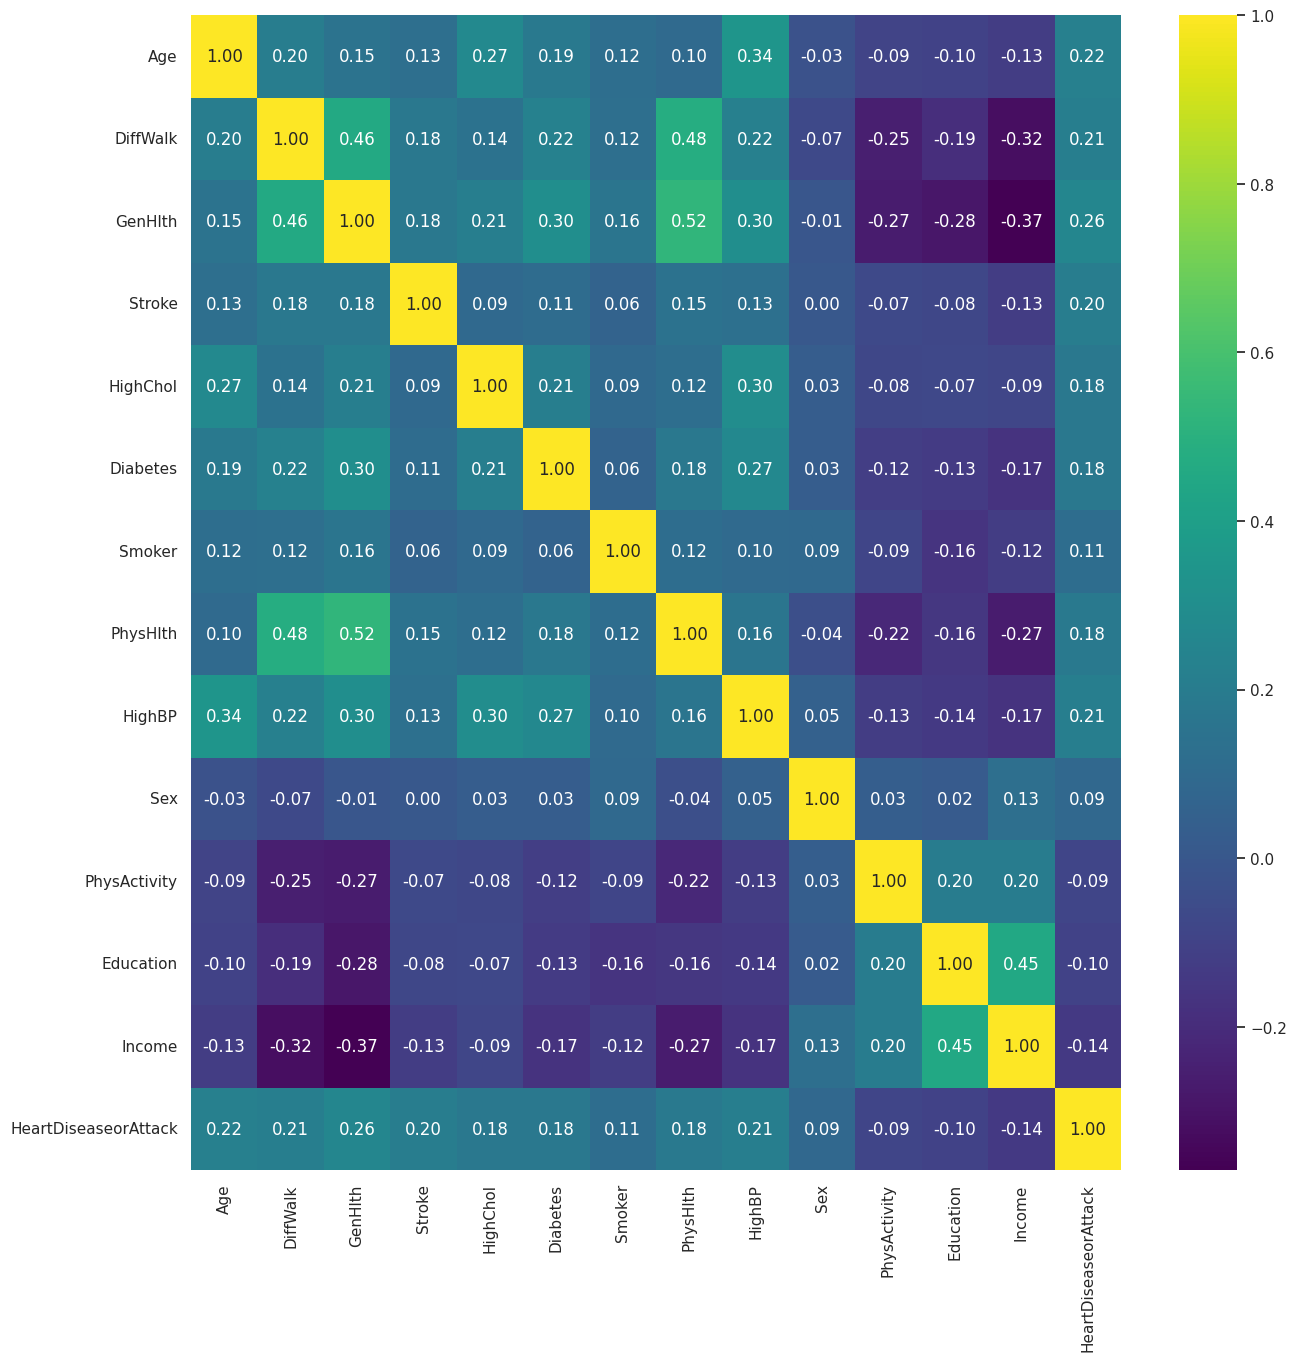

In [ ]:
plt.figure(figsize=(15,15))
plt(sns.heatmap(data_hc.corr(),annot=True, fmt=".2f",cmap="viridis"))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0, 0.5, 'PhysHlth')

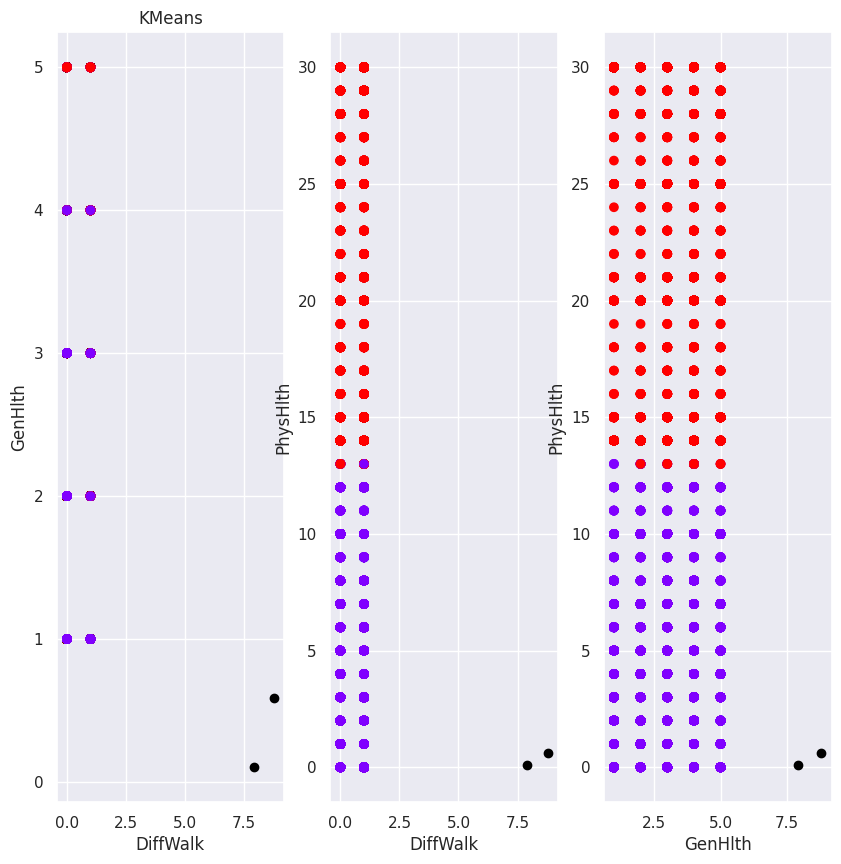

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train)
plt.figure(figsize=(10,10))

plt.subplot(131)
plt.title('KMeans')
plt.scatter(X_train[:,1],X_train[:,2], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')
plt.xlabel('DiffWalk')
plt.ylabel('GenHlth')
plt.subplot(132)
plt.scatter(X_train[:,1],X_train[:,7], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')
plt.xlabel('DiffWalk')
plt.ylabel('PhysHlth')
plt.subplot(133)
plt.scatter(X_train[:,2],X_train[:,7], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')
plt.xlabel('GenHlth')
plt.ylabel('PhysHlth')

# **DBScan**

Text(0, 0.5, 'PhysHlth')

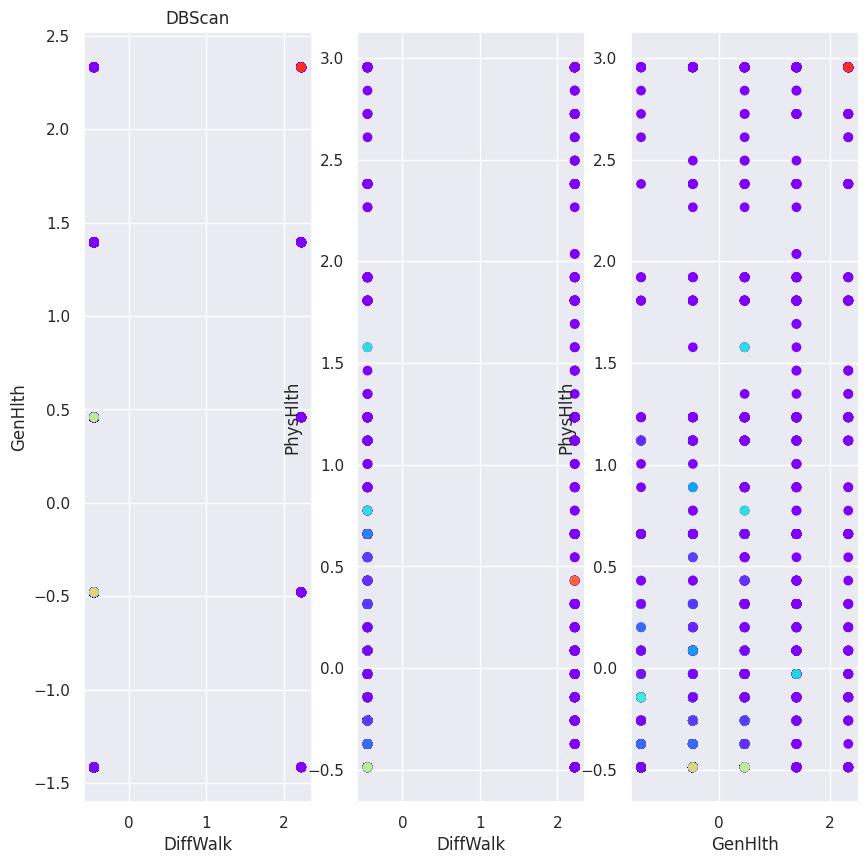

In [ ]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X_train)
DBS = DBSCAN(eps=1)
DBS.fit(X[:10000,:])


plt.figure(figsize=(10,10))

plt.subplot(131)
plt.title('DBScan')
plt.scatter(X[:10000,1],X[:10000,2], c=DBS.labels_, cmap='rainbow')
plt.xlabel('DiffWalk')
plt.ylabel('GenHlth')
plt.subplot(132)
plt.scatter(X[:10000,1],X[:10000,7], c=DBS.labels_, cmap='rainbow')
plt.xlabel('DiffWalk')
plt.ylabel('PhysHlth')
plt.subplot(133)
plt.scatter(X[:10000,2],X[:10000,7], c=DBS.labels_, cmap='rainbow')
plt.xlabel('GenHlth')
plt.ylabel('PhysHlth')

In [ ]:
pca_hc = PCA(n_components= 4, whiten=True)
X_pca_train = pca_hc.fit_transform(X_train)
X_pca_test = pca_hc.fit_transform(X_test)

In [ ]:
est = GaussianNB()

est.fit(X_pca_train,y_train)
y_pred = est.predict(X_pca_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.95      0.93     45867
         1.0       0.28      0.18      0.21      4869

    accuracy                           0.88     50736
   macro avg       0.60      0.56      0.57     50736
weighted avg       0.85      0.88      0.86     50736



In [ ]:
est = DecisionTreeClassifier(max_depth=6)
est.fit(X_pca_train,y_train)
print(classification_report(y_test, est.predict(X_pca_test), zero_division=0))

              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95     45867
         1.0       0.20      0.00      0.01      4869

    accuracy                           0.90     50736
   macro avg       0.55      0.50      0.48     50736
weighted avg       0.84      0.90      0.86     50736



In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= X_pca_train[0].shape),
    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(256, activation=tf.nn.tanh),
    tf.keras.layers.Dense(128, activation=tf.nn.tanh),
    tf.keras.layers.Dense(64, activation=tf.nn.gelu),
    tf.keras.layers.Dense(32, activation=tf.nn.gelu),
    tf.keras.layers.Dense(2, activation=tf.nn.softmax)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 4)                 0         
                                                                 
 dense_7 (Dense)             (None, 1024)              5120      
                                                                 
 dense_8 (Dense)             (None, 512)               524800    
                                                                 
 dense_9 (Dense)             (None, 256)               131328    
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                                 
 dense_11 (Dense)            (None, 64)                8256      
                                                                 
 dense_12 (Dense)            (None, 32)               

In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),  #AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=["accuracy"])
model.fit(X_pca_train, y_train, epochs=5)



Epoch 1/5
6342/6342 [==============================] - 43s 5ms/step - loss: 0.2984 - accuracy: 0.9053
Epoch 2/5
6342/6342 [==============================] - 28s 4ms/step - loss: 0.2550 - accuracy: 0.9063
Epoch 3/5
6342/6342 [==============================] - 28s 4ms/step - loss: 0.2540 - accuracy: 0.9063
Epoch 4/5
6342/6342 [==============================] - 27s 4ms/step - loss: 0.2537 - accuracy: 0.9063
Epoch 5/5
6342/6342 [==============================] - 29s 5ms/step - loss: 0.2535 - accuracy: 0.9063


In [ ]:
y_pred = model.predict(X_pca_test)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

1586/1586 [==============================] - 3s 2ms/step
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95     45867
         1.0       0.19      0.00      0.01      4869

    accuracy                           0.90     50736
   macro avg       0.55      0.50      0.48     50736
weighted avg       0.84      0.90      0.86     50736



In [ ]:
est = RandomForestClassifier(n_estimators=100, random_state=21, max_depth=10)
est.fit(X_pca_train,y_train)
y_pred = est.predict(X_pca_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95     45867
         1.0       0.23      0.00      0.01      4869

    accuracy                           0.90     50736
   macro avg       0.57      0.50      0.48     50736
weighted avg       0.84      0.90      0.86     50736



In [ ]:
tsne_hc = TSNE(n_components=2)
X_pca_tsne_train =  tsne_hc.fit(X_pca_train[:10000,:])
X_pca_tsne_test =  tsne_hc.fit(X_pca_test[:10000,:])

In [ ]:
est = GaussianNB()

est.fit(X_pca_tsne_train,y_train[:10000])
y_pred = est.predict(X_pca_tsne_test)
print(classification_report(y_test[:10000], y_pred))

ValueError: ignored

In [ ]:
est = DecisionTreeClassifier(max_depth=6)
est.fit(X_pca_tsne_train,y_train[:10000])
print(classification_report(y_test[:10000], est.predict(X_pca_tsne_test), zero_division=0))

              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94      9032
         1.0       0.12      0.03      0.04       968

    accuracy                           0.89     10000
   macro avg       0.51      0.50      0.49     10000
weighted avg       0.83      0.89      0.85     10000



In [ ]:
est = RandomForestClassifier(n_estimators=100, random_state=21, max_depth=10)
est.fit(X_pca_tsne_train,y_train[:10000])
y_pred = est.predict(X_pca_tsne_test)
print(classification_report(y_test[:10000], y_pred))

              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95      9032
         1.0       0.00      0.00      0.00       968

    accuracy                           0.90     10000
   macro avg       0.45      0.50      0.47     10000
weighted avg       0.82      0.90      0.86     10000



In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= X_pca_train[0].shape),
    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(256, activation=tf.nn.tanh),
    tf.keras.layers.Dense(128, activation=tf.nn.tanh),
    tf.keras.layers.Dense(64, activation=tf.nn.gelu),
    tf.keras.layers.Dense(32, activation=tf.nn.gelu),
    tf.keras.layers.Dense(2, activation=tf.nn.softmax)
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 4)                 0         
                                                                 
 dense_14 (Dense)            (None, 1024)              5120      
                                                                 
 dense_15 (Dense)            (None, 512)               524800    
                                                                 
 dense_16 (Dense)            (None, 256)               131328    
                                                                 
 dense_17 (Dense)            (None, 128)               32896     
                                                                 
 dense_18 (Dense)            (None, 64)                8256      
                                                                 
 dense_19 (Dense)            (None, 32)               

In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),  #AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=["accuracy"])
model.fit(X_pca_train, y_train, epochs=5)


Epoch 1/5
6342/6342 [==============================] - 52s 7ms/step - loss: 0.3268 - accuracy: 0.9060
Epoch 2/5
6342/6342 [==============================] - 26s 4ms/step - loss: 0.2586 - accuracy: 0.9063
Epoch 3/5
6342/6342 [==============================] - 28s 4ms/step - loss: 0.2547 - accuracy: 0.9063
Epoch 4/5
6342/6342 [==============================] - 29s 5ms/step - loss: 0.2541 - accuracy: 0.9063
Epoch 5/5
6342/6342 [==============================] - 26s 4ms/step - loss: 0.2538 - accuracy: 0.9063


In [ ]:
y_pred = model.predict(X_pca_test)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))